In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
import datetime as dt
import os
import matplotlib.pyplot as plt
import matplotlib.dates as md
from xlsxwriter.utility import xl_rowcol_to_cell
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:

#create random dataframe

np.random.seed(1111)
df = pd.DataFrame({
'Category':np.random.choice( ['Group A','Group B','Group C','Group D'], 10000),
'Sub-Category':np.random.choice( ['X','Y','Z'], 10000),
'Sub-Category-2':np.random.choice( ['G','F','I'], 10000),
'Product':np.random.choice( ['Product 1','Product 2','Product 3'], 10000),
'Units_Sold':np.random.randint(1,100, size=(10000)),
'Dollars_Sold':np.random.randint(100,1000, size=10000),
'Customer':np.random.choice(["Customer1", "Customer2", "Customer3","Customer4","Customer5","Customer6"],10000),
'Date':np.random.choice( pd.date_range('1/1/2018','03/12/2022',  
                      freq='D'), 10000)})


#add year & week of year to dataframe
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.weekofyear

/tmp/ipykernel_517/2709010222.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


In [4]:
df.head()

,Category,Sub-Category,Sub-Category-2,Product,Units_Sold,Dollars_Sold,Customer,Date,Year,WeekOfYear
0,Group A,X,I,Product 2,2,766,Customer2,2019-06-19,2019,25
1,Group D,Y,I,Product 1,77,829,Customer2,2020-01-09,2020,2
2,Group B,X,I,Product 3,48,772,Customer3,2019-03-26,2019,13
3,Group B,Y,F,Product 1,55,894,Customer1,2021-03-18,2021,11
4,Group A,X,F,Product 3,53,629,Customer5,2021-04-17,2021,15


In [5]:
#example analysis to compare sales year over year with December Month End
df.groupby(['Category',pd.Grouper(key='Date',freq='A')]).agg(Units = ('Units_Sold','sum')).unstack()

Units                                            
Date     2018-12-31 2019-12-31 2020-12-31 2021-12-31 2022-12-31
Category                                                       
Group A       29486      31433      28758      31055       6436
Group B       30361      30426      32163      27263       6923
Group C       29225      27737      28968      30634       5049
Group D       29648      29809      31821      27421       6698

In [6]:
#create dataframe to graph weekly sales
#graph to explore cumualtive sales
p = df.groupby(['Category','WeekOfYear','Year']).agg(Units=('Units_Sold','sum')).unstack().groupby(level=0).cumsum().stack().reset_index()
p

,Category,WeekOfYear,Year,Units
0,Group A,1,2018,424.0
1,Group A,1,2019,643.0
2,Group A,1,2020,322.0
3,Group A,1,2021,644.0
4,Group A,1,2022,570.0
...,...,...,...,...
879,Group D,52,2020,31577.0
880,Group D,52,2021,27154.0
881,Group D,52,2022,6698.0
882,Group D,53,2020,31821.0


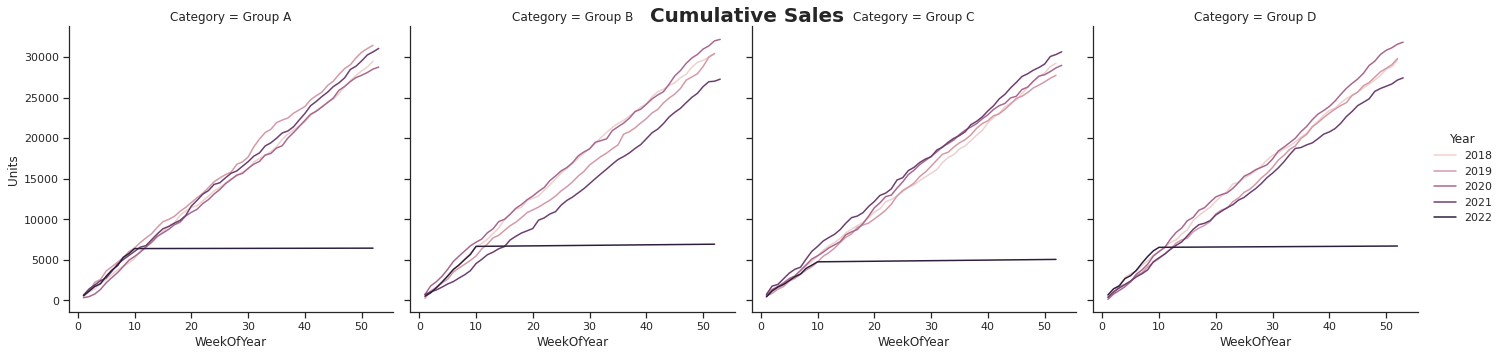

In [7]:
#example graph for comparing weekly sales across years
g = sns.relplot(data=p,x='WeekOfYear',y='Units', hue='Year',col='Category',kind='line');
g.fig.suptitle("Cumulative Sales", fontsize=20, fontweight='bold');

In [ ]:
'''
- Goal is to create a figure like above per Category (or any sub-grouping - could be Customer, Product, etc.)
- Would like to line graphs to compare different 52 week or 365 day periods, besides the Week 1 - Week 53 shown above
= For example - would like to compare & visualize the following:
-- Graph 
---Week 14 2021 to Week 13 2022 vs. 
---Week 14 2020 to Week 13 2021
---Week 14 2019 to Week 13 2020
- Please see hypothetical graph in jpg format on Github
'''

